Ordinary Linear Regression Equation
y =  0.0093775938795 x  + 0.402745921624
R2 =  0.765296114812


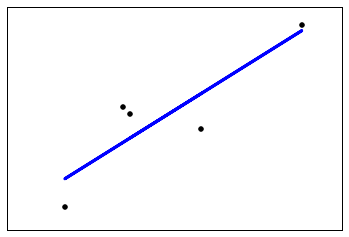

In [1]:
# learn some chemistry
from rdkit import rdBase
from rdkit import RDConfig
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem

# learn to draw etc.
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline 

# learn some math etc.
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# reading data
df = pd.read_csv ('/home/chembl/notebooks/FabiansTests/read_it.csv')
smi = df['SMILES']
resu = df['pEC50']
res = map(float, resu)

# calculate descriptors and develop new super-descriptor
newdes_list = []
for i in smi:
    logp = Descriptors.MolLogP(Chem.MolFromSmiles(i))
    tpsa = Descriptors.TPSA(Chem.MolFromSmiles(i))
    newdes = (logp**2/tpsa*12)*100
    newdes_list.append(newdes)

# modelling data
a = np.array(newdes_list)
b = np.array(res)
arr = np.array([(b), (a)])
trarr = np.transpose(arr)
x_train = trarr[:, np.newaxis, 1]
y_train = trarr[:, np.newaxis, 0]

# linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)
r2 = r2_score(y_train,lr.predict(x_train))
print "Ordinary Linear Regression Equation"
print ("y = "),(lr.coef_[0,0]),("x "),("+"),(lr.intercept_[0])
print ("R2 = "),r2
       
# visualise model
plt.scatter(x_train, y_train,  color='black')
plt.plot(x_train, lr.predict(x_train), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()
